## Corona Tracker
    install git mkae a git folder go there then:
    type this into a folder (unix) git pull https://github.com/CSSEGISandData/COVID-19.git
    or just download the data.
    
    This data is currently plotted here: https://coronavirus.jhu.edu/map.html

In [14]:
import sys, os, copy, pprint, glob
import datetime
import csv,random

#Make sure these libraries are installed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

In [20]:
#Build all locations List Curate to make loc_lst_mapTo.csv

locLst=[]
c_ud='../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
for inp in glob.glob(c_ud+'*.csv'):
    fn=os.path.basename(inp)
    cor_data= pd.read_csv(inp)
    try:
        locLst.extend(cor_data[['Country/Region', 'Province/State', 'Latitude', 'Longitude']].values.tolist())
    except:
        locLst.extend(cor_data[['Country/Region', 'Province/State']].values.tolist())
    
loclst_df=pd.DataFrame(locLst, columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude'])
loclst_df.drop_duplicates(keep='first',inplace=True) 
loclst_df.to_csv('data/loc_lst.csv')

In [21]:
p = subprocess.Popen(['git', 'pull'], cwd='../COVID-19/')
p.wait()

c_ud='../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
country='US';population_M=300
#country='Italy';population_M=65
#country='Romania';population_M=20
#country='Iceland';population_M=0.330

mapto_df=pd.read_csv('data/loc_lst_mapTo.csv')
d={}
locLst=[]
for inp in glob.glob(c_ud+'*.csv'):
    fn=os.path.basename(inp)
    file_date=fn.split('.')[0]
    cor_data= pd.read_csv(inp)
    us_df=cor_data[cor_data['Country/Region']==country]
    d[file_date]={}
    total_cases=0
    for i, row in us_df.iterrows():
        country=row['Country/Region']
        pstate=row['Province/State']
        try:
            location=mapto_df.loc[(mapto_df['Country/Region']==country) & (mapto_df['Province/State']==pstate)].values.tolist()[0][-3]
        except:
            print ('You need to update data/loc_lst_mapTo.csv  UNKNOWN:', country, pstate)
            location=country
        
        d[file_date][location]=row['Confirmed']
        total_cases+=row['Confirmed']
dLst=list(d.keys())
dLst.sort()
df=pd.DataFrame(d, columns=dLst).fillna(0)
df['row_max']=df.max(axis=1)
df.loc['total_counts', :] = df.sum(axis=0)
df=df.sort_values(by=['row_max'],ascending=False)
df.to_csv('data/%s_latest.csv'%country)


df

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,row_max
total_counts,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,6.0,...,913.0,1234.0,1611.0,2132.0,2680.0,3437.0,4563.0,6352.0,7704.0,7811.0
NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,173.0,220.0,328.0,421.0,525.0,732.0,967.0,1706.0,2495.0,2495.0
WA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,267.0,366.0,442.0,568.0,572.0,643.0,904.0,1076.0,1014.0,1076.0
CA,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,144.0,177.0,221.0,282.0,340.0,426.0,557.0,698.0,751.0,751.0
FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,28.0,35.0,50.0,76.0,115.0,155.0,216.0,314.0,314.0
NJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,23.0,29.0,29.0,69.0,98.0,178.0,267.0,267.0,267.0
LA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,19.0,36.0,77.0,91.0,136.0,196.0,257.0,257.0
MA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,92.0,95.0,108.0,123.0,138.0,164.0,197.0,218.0,218.0,218.0
GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,23.0,31.0,42.0,66.0,99.0,121.0,146.0,199.0,199.0
CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,34.0,45.0,49.0,101.0,131.0,160.0,160.0,184.0,184.0


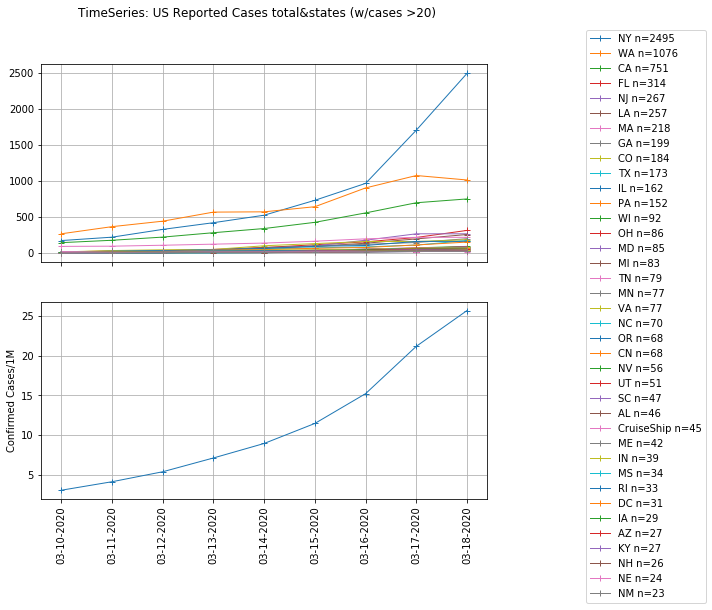

In [22]:
start_pnt=-10;report_thresh=20

lineLst=df.index

fig, axs = plt.subplots(2, sharex=True,figsize=(8,8))
fig.suptitle('TimeSeries: US Reported Cases total&states (w/cases >%i)'%report_thresh)

for st in lineLst:
    if st=='total_counts': continue
    x=df.loc[st]
    st_sum=x.row_max
    if st_sum<report_thresh:continue
    axs[0].plot( df.columns[start_pnt:-1], df.loc[st][start_pnt:-1], marker='+', linewidth=1, label='%s n=%i'%(st, st_sum))
    axs[0].grid(True)
    plt.ylabel('Confirmed Cases')
    

axs[0].legend(loc='best', bbox_to_anchor=(1.0, 0.7, 0.5, 0.5))

st='total_counts'
axs[1].plot( df.columns[start_pnt:-1], df.loc[st][start_pnt:-1]/population_M, marker='+', linewidth=1, label='%s n=%i'%(st, st_sum))
plt.ylabel('Confirmed Cases/1M')
plt.xticks(rotation=90)
plt.grid(True)